In [1]:
import os
import random
import sqlite3
import datetime

import numpy as np
import pandas as pd

In [2]:
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [22]:
con_pharma = sqlite3.connect(os.path.join(os.getcwd(), "../Database/fypdb-EVs3.sqlite"))

In [4]:
tweet_df = pd.read_sql_query(f"SELECT * from ev_tweets_count", con_pharma)

In [5]:
len(tweet_df['tweetDate'].unique())

780

In [7]:
tweet_df['count'].value_counts()

1       902407
2       142352
3        37487
4        15409
5         8630
         ...  
392          1
2163         1
393          1
399          1
1023         1
Name: count, Length: 466, dtype: int64

In [8]:
tweet_df.describe()

,count
count,1.145750e+06
mean,2.128959e+00
std,1.550348e+01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,8.822000e+03


<AxesSubplot:>

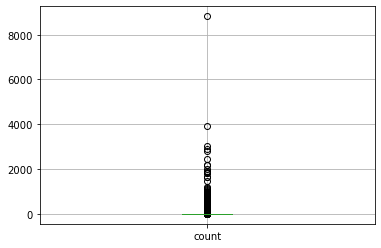

In [9]:
tweet_df.boxplot()

In [10]:
tweet_df = pd.read_sql_query(f"SELECT * from ev_tweets_count WHERE count >= 5", con_pharma)

In [11]:
tweet_df.describe()

,count
count,48095.000000
mean,22.414950
std,72.724621
min,5.000000
25%,6.000000
50%,9.000000
75%,19.000000
max,8822.000000


<AxesSubplot:>

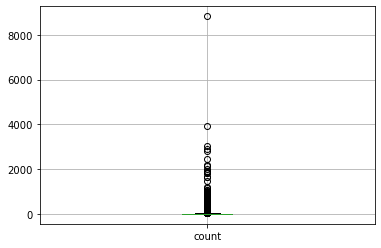

In [12]:
tweet_df.boxplot()

In [13]:
tweet_df['count'] = tweet_df['count'].apply(lambda x: 20 if x > 20 else x) 

In [14]:
tweet_df.describe()

,count
count,48095.000000
mean,11.447968
std,5.912437
min,5.000000
25%,6.000000
50%,9.000000
75%,19.000000
max,20.000000


<AxesSubplot:>

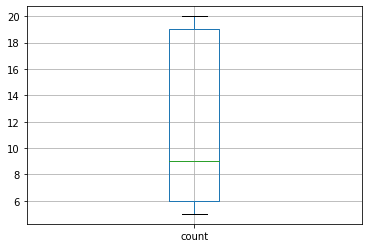

In [15]:
tweet_df.boxplot()

In [16]:
len(tweet_df['tweetDate'].unique())

780

In [17]:
tweet_df['count'].value_counts()

20    12002
5      8630
6      5772
7      4268
8      3441
9      2710
10     2119
11     1721
12     1342
13     1199
14     1041
15      929
16      890
17      773
18      630
19      628
Name: count, dtype: int64

In [18]:
def write_to_db(con, df):
    cursor = con.cursor()
    
    try:
        cursor.execute('''CREATE TABLE IF NOT EXISTS reduced_tweet_counts (
              category TEXT, 
              tweetDate DATE, 
              count INTEGER, 
              tweet TEXT, 
              CONSTRAINT uniq_val PRIMARY KEY (category, tweetDate, tweet))''')
        con.commit()
        
        df.to_sql('reduced_tweet_counts', con, if_exists='replace', index=False)
        con.commit()
        
    except sqlite3.Error as error:
        print({error})
    
    finally:
        cursor.close()
        con.close()

In [23]:
write_to_db(con_pharma, tweet_df)

In [20]:
tweet_df['tweetDate'].value_counts()

2022-01-26    343
2022-04-20    307
2021-04-26    302
2022-04-29    219
2021-02-08    217
             ... 
2020-05-25      7
2020-12-25      6
2020-04-11      6
2020-04-12      4
2020-04-05      3
Name: tweetDate, Length: 780, dtype: int64

In [21]:
con = sqlite3.connect(os.path.join(os.getcwd(), "../Database/fypdb-EVs2.sqlite"))
cursor = con.cursor()
cursor.execute("DROP TABLE ev_tweets_count")
con.commit()